In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.metrics import cohen_kappa_score

In [2]:
# Import the datasets
df1 = pd.read_csv('F_List1.csv',delimiter=' ',header=None)
df2 = pd.read_csv('F_List2.csv',delimiter=' ',header=None)
df3 = pd.read_csv('F_List3.csv',delimiter=' ',header=None)
df4 = pd.read_csv('F_List4.csv',delimiter=' ',header=None)
df5 = pd.read_csv('F_List5.csv',delimiter=' ',header=None)
df6 = pd.read_csv('F_List6.csv',delimiter=' ',header=None)
df7 = pd.read_csv('F_List7.csv',delimiter=' ',header=None)
df8 = pd.read_csv('F_List8.csv',delimiter=' ',header=None)
df9 = pd.read_csv('F_List9.csv',delimiter=' ',header=None)
df10 = pd.read_csv('F_List10.csv',delimiter=' ',header=None)
df11 = pd.read_csv('F_List11.csv',delimiter=' ',header=None)
df12 = pd.read_csv('F_List12.csv',delimiter=' ',header=None)
df13 = pd.read_csv('F_List13.csv',delimiter=' ',header=None)
df14 = pd.read_csv('F_List14.csv',delimiter=' ',header=None)
df15 = pd.read_csv('F_List15.csv',delimiter=' ',header=None)
df16 = pd.read_csv('F_List16.csv',delimiter=' ',header=None)
df17 = pd.read_csv('F_List17.csv',delimiter=' ',header=None)
df18 = pd.read_csv('F_List18.csv',delimiter=' ',header=None)
df19 = pd.read_csv('F_List19.csv',delimiter=' ',header=None)
df20 = pd.read_csv('F_List20.csv',delimiter=' ',header=None)

In [3]:
# Import the datasets
df_new1 = pd.read_csv('F_raw_rawL1.csv',delimiter=' ',header=None)
df_new2 = pd.read_csv('F_raw_rawL2.csv',delimiter=' ',header=None)
df_new3 = pd.read_csv('F_raw_rawL3.csv',delimiter=' ',header=None)
df_new4 = pd.read_csv('F_raw_rawL4.csv',delimiter=' ',header=None)
df_new5 = pd.read_csv('F_raw_rawL5.csv',delimiter=' ',header=None)
df_new6 = pd.read_csv('F_raw_rawL6.csv',delimiter=' ',header=None)
df_new7 = pd.read_csv('F_raw_rawL7.csv',delimiter=' ',header=None)
df_new8 = pd.read_csv('F_raw_rawL8.csv',delimiter=' ',header=None)
df_new9 = pd.read_csv('F_raw_rawL9.csv',delimiter=' ',header=None)
df_new10 = pd.read_csv('F_raw_rawL10.csv',delimiter=' ',header=None)
df_new11 = pd.read_csv('F_raw_rawL11.csv',delimiter=' ',header=None)
df_new12 = pd.read_csv('F_raw_rawL12.csv',delimiter=' ',header=None)
df_new13 = pd.read_csv('F_raw_rawL13.csv',delimiter=' ',header=None)
df_new14 = pd.read_csv('F_raw_rawL14.csv',delimiter=' ',header=None)
df_new15 = pd.read_csv('F_raw_rawL15.csv',delimiter=' ',header=None)
df_new16 = pd.read_csv('F_raw_rawL16.csv',delimiter=' ',header=None)
df_new17 = pd.read_csv('F_raw_rawL17.csv',delimiter=' ',header=None)
df_new18 = pd.read_csv('F_raw_rawL18.csv',delimiter=' ',header=None)
df_new19 = pd.read_csv('F_raw_rawL19.csv',delimiter=' ',header=None)
df_new20 = pd.read_csv('F_raw_rawL20.csv',delimiter=' ',header=None)

In [4]:
# Merge all these dataframes in a big dataframe
List1 = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20]
List2 = [df_new1,df_new2,df_new3,df_new4,df_new5,df_new6,df_new7,df_new8,df_new9,df_new10,df_new11,df_new12,df_new13,df_new14,df_new15,df_new16,df_new17,df_new18,df_new19,df_new20]
List = List1 + List2
df = pd.concat(List)

In [5]:
# Check for inf or -inf values
Min = []
Max = []
i=1
while i<83:
    if min(df[i])==-np.inf:
        Min.append(i)
    if max(df[i])==np.inf:
        Max.append(i)
    i+=1
print(Min)
print(Max)

[7, 10]
[13, 16]


In [6]:
# Drop the first column and change the header name
header = []
i=1
while i<83:
    header.append(i)
    i+=1
df=df.drop(df.columns[0],axis=1)
df.columns=header

In [7]:
"""
Model 1: Change the target beta to 1 when it is strictly greater than 0
"""
# Drop those columns with inf value
df1=df.replace([np.inf, -np.inf], np.nan)
df1=df1.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df1[82] = (df1[82] > 0).astype(int)
X1 = df1.iloc[:,0:77]
y1 = df1[82]

In [8]:
# Split the dataset into training and test sets
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=train_percentage)

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
# Train the random forest classifier
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

#Feature ranking
forest = ExtraTreesClassifier(n_estimators=78,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

					Random Forest Result
Train Accuracy ::  0.9828458942632171
Test Accuracy  ::  0.6687289088863893
Kappa score  ::  0.33055025066601895
 Confusion matrix  [[1427  434]
 [ 744  951]]
             precision    recall  f1-score   support

          0       0.66      0.77      0.71      1861
          1       0.69      0.56      0.62      1695

avg / total       0.67      0.67      0.66      3556

Feature ranking:
1. feature 14 (0.036283)
2. feature 21 (0.036069)
3. feature 20 (0.034655)
4. feature 50 (0.033247)
5. feature 28 (0.031021)
6. feature 24 (0.029226)
7. feature 26 (0.028929)
8. feature 29 (0.028331)
9. feature 76 (0.027150)
10. feature 66 (0.027038)
11. feature 55 (0.025298)
12. feature 75 (0.024833)
13. feature 68 (0.024061)
14. feature 61 (0.023983)
15. feature 3 (0.023720)
16. feature 11 (0.023592)
17. feature 25 (0.023484)
18. feature 16 (0.023456)
19. feature 9 (0.023353)
20. feature 17 (0.023301)
21. feature 5 (0.022973)
22. feature 1 (0.022562)
23. feature 2 (0.022553)

In [10]:
# Train the logistic regression classifier
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predictions))

					Logistic Regression Result
0.6912260967379078
0.7574241653312284
[[1146  715]
 [ 383 1312]]
             precision    recall  f1-score   support

          0       0.66      0.77      0.71      1861
          1       0.69      0.56      0.62      1695

avg / total       0.67      0.67      0.66      3556

Kappa score  ::  0.33055025066601895


In [11]:
# Train the SVM classifier
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))

					SVM Result
0.5672103487064117
             precision    recall  f1-score   support

          0       0.66      0.77      0.71      1861
          1       0.69      0.56      0.62      1695

avg / total       0.67      0.67      0.66      3556



					kNN Result
Accuracy Score :: 0.6296400449943758
             precision    recall  f1-score   support

          0       0.64      0.67      0.65      1861
          1       0.62      0.59      0.60      1695

avg / total       0.63      0.63      0.63      3556

The optimal number of neighbors is 7


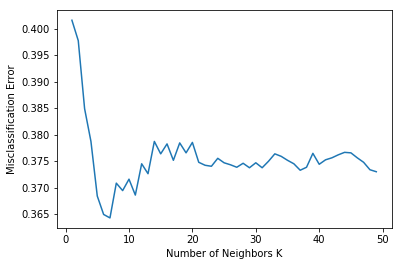

In [12]:
# Train the kNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [13]:
# Train the Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))

					Naive Bayes Result
             precision    recall  f1-score   support

          0       0.67      0.64      0.66      1861
          1       0.63      0.66      0.64      1695

avg / total       0.65      0.65      0.65      3556

[[1200  661]
 [ 582 1113]]
Kappa score  ::  0.3008264598766448


In [14]:
# Train the Neural Network

#Scale the feature
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

					Neural Network Result
[[1296  565]
 [ 700  995]]
             precision    recall  f1-score   support

          0       0.65      0.70      0.67      1861
          1       0.64      0.59      0.61      1695

avg / total       0.64      0.64      0.64      3556



In [15]:
"""
Model 2: Change the target beta to 1 when beta is greater than 0.05
"""
df2=df.replace([np.inf, -np.inf], np.nan)
df2=df2.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df2[82] = (df2[82] > 0.05).astype(int)
X = df2.iloc[:,0:77]
y = df2[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
# Train the random forest classifier
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=78,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

					Random Forest Result
Train Accuracy ::  0.9868766404199475
Test Accuracy  ::  0.8892013498312711
 Confusion matrix  [[3127   59]
 [ 335   35]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3186
          1       0.37      0.09      0.15       370

avg / total       0.85      0.89      0.86      3556

Feature ranking:
1. feature 20 (0.037278)
2. feature 14 (0.035724)
3. feature 50 (0.034160)
4. feature 21 (0.032916)
5. feature 28 (0.031879)
6. feature 26 (0.028847)
7. feature 66 (0.028802)
8. feature 76 (0.026666)
9. feature 16 (0.025960)
10. feature 1 (0.025412)
11. feature 2 (0.025378)
12. feature 3 (0.025263)
13. feature 29 (0.025048)
14. feature 12 (0.024137)
15. feature 9 (0.024041)
16. feature 17 (0.023888)
17. feature 25 (0.023765)
18. feature 75 (0.023521)
19. feature 22 (0.023481)
20. feature 11 (0.023241)
21. feature 6 (0.023141)
22. feature 18 (0.023053)
23. feature 55 (0.023005)
24. feature 68 (0.022960)
25. featur

In [18]:
# Train the logistic regression classifier
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))

					Logistic Regression Result
0.8956692913385826
0.8174988547869904
[[3185    1]
 [ 370    0]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3186
          1       0.37      0.09      0.15       370

avg / total       0.85      0.89      0.86      3556



In [19]:
# Train the SVM classifier
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))

					SVM Result
0.8942632170978627
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3186
          1       0.37      0.09      0.15       370

avg / total       0.85      0.89      0.86      3556



					kNN Result
Accuracy Score :: 0.8945444319460067
             precision    recall  f1-score   support

          0       0.90      1.00      0.94      3186
          1       0.22      0.01      0.01       370

avg / total       0.83      0.89      0.85      3556

The optimal number of neighbors is 47


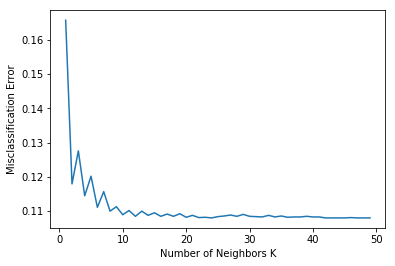

In [20]:
# Train the kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [21]:
# Train the Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

					Naive Bayes Result
             precision    recall  f1-score   support

          0       0.96      0.62      0.75      3186
          1       0.19      0.78      0.31       370

avg / total       0.88      0.63      0.71      3556

[[1967 1219]
 [  82  288]]
Kappa score  ::  0.16783657035466937



In [22]:
# Train the Neural Network

#Scale the feature
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

					Neural Network Result
[[2959  227]
 [ 261  109]]
             precision    recall  f1-score   support

          0       0.92      0.93      0.92      3186
          1       0.32      0.29      0.31       370

avg / total       0.86      0.86      0.86      3556



In [23]:
"""
Model 3: Linear Regression
"""
df3=df.replace([np.inf, -np.inf], np.nan)
df3=df3.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
X = df3.iloc[:,0:77]
y = df3[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print ("\t\t\t\t\tLinear Regression Result")
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R squared: %.2f' % r2_score(y_test, y_pred))

					Linear Regression Result
Mean squared error: 0.00
R squared: 0.12


C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
"""
Model 4: Beta > 0.05 vs beta < 0.01
"""

df4=df.replace([np.inf, -np.inf], np.nan)
df4=df4.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df4 = df4[(df4[82] >= 0.05) | (df4[82] <= 0.01)]
df4[82] = (df4[82] > 0.05).astype(int)
X = df4.iloc[:,0:77]
y = df4[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9863431151241535
Test Accuracy  ::  0.8767772511848341
 Confusion matrix  [[2504   71]
 [ 293   86]]
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      2575
          1       0.55      0.23      0.32       379

avg / total       0.85      0.88      0.85      2954


					Logistic Regression Result
0.8716993906567366
0.8768973025591105
[[2575    0]
 [ 379    0]]
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      2575
          1       0.55      0.23      0.32       379

avg / total       0.85      0.88      0.85      2954


					SVM Result
0.8740690589031821
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      2575
          1       0.55      0.23      0.32       379

avg / total       0.85      0.88      0.85      2954


					kNN Result
Accuracy Score :: 0.8747461069735951
             precis

In [25]:
"""
Model 5: Pure integer problems. Beta > 0
"""
df_new = pd.concat(List1)
df_new=df_new.drop(df_new.columns[0],axis=1)
df5=df_new.replace([np.inf, -np.inf], np.nan)
df5=df5.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df5[82] = (df5[82] > 0).astype(int)
X = df5.iloc[:,0:77]
y = df5[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9854249479462427
Test Accuracy  ::  0.6263486655309484
 Confusion matrix  [[644 280]
 [378 459]]
             precision    recall  f1-score   support

          0       0.63      0.70      0.66       924
          1       0.62      0.55      0.58       837

avg / total       0.63      0.63      0.62      1761


					Logistic Regression Result
0.6643952299829642
0.7458158130201141
[[524 400]
 [191 646]]
             precision    recall  f1-score   support

          0       0.63      0.70      0.66       924
          1       0.62      0.55      0.58       837

avg / total       0.63      0.63      0.62      1761


					SVM Result
0.5667234525837592
             precision    recall  f1-score   support

          0       0.63      0.70      0.66       924
          1       0.62      0.55      0.58       837

avg / total       0.63      0.63      0.62      1761


					kNN Result
Accuracy Score :: 0.6416808631459399
             precision    r

In [26]:
"""
Model 6: Pure integer problems. Beta > 0.05
"""
df_new = pd.concat(List1)
df_new=df_new.drop(df_new.columns[0],axis=1)
df5=df_new.replace([np.inf, -np.inf], np.nan)
df5=df5.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df5[82] = (df5[82] > 0.05).astype(int)
X = df5.iloc[:,0:77]
y = df5[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9854249479462427
Test Accuracy  ::  0.892106757524134
 Confusion matrix  [[1556   24]
 [ 166   15]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1580
          1       0.38      0.08      0.14       181

avg / total       0.85      0.89      0.86      1761


					Logistic Regression Result
0.8972174900624645
0.8351667948807608
[[1580    0]
 [ 181    0]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1580
          1       0.38      0.08      0.14       181

avg / total       0.85      0.89      0.86      1761


					SVM Result
0.8977853492333902
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1580
          1       0.38      0.08      0.14       181

avg / total       0.85      0.89      0.86      1761


					kNN Result
Accuracy Score :: 0.8949460533787621
             precisi

In [27]:
"""
Model 7: Mixed integer problems. Beta > 0
"""
df_new = pd.concat(List2)
df_new=df_new.drop(df_new.columns[0],axis=1)
df7=df_new.replace([np.inf, -np.inf], np.nan)
df7=df7.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df7[82] = (df7[82] > 0.05).astype(int)
X = df7.iloc[:,0:77]
y = df7[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9827298050139276
Test Accuracy  ::  0.8852367688022285
 Confusion matrix  [[1577   27]
 [ 179   12]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1604
          1       0.31      0.06      0.10       191

avg / total       0.84      0.89      0.85      1795


					Logistic Regression Result
0.8935933147632312
0.8430200676319672
[[1604    0]
 [ 191    0]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1604
          1       0.31      0.06      0.10       191

avg / total       0.84      0.89      0.85      1795


					SVM Result
0.8924791086350975
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1604
          1       0.31      0.06      0.10       191

avg / total       0.84      0.89      0.85      1795


					kNN Result
Accuracy Score :: 0.8935933147632312
             precis

In [28]:
"""
Model 8: Mixed integer problems. Beta > 0.05
"""
df_new = pd.concat(List2)
df_new=df_new.drop(df_new.columns[0],axis=1)
df8=df_new.replace([np.inf, -np.inf], np.nan)
df8=df8.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df8[82] = (df8[82] > 0.05).astype(int)
X = df8.iloc[:,0:77]
y = df8[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9879294336118849
Test Accuracy  ::  0.8779944289693593
 Confusion matrix  [[1559   33]
 [ 186   17]]
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1592
          1       0.34      0.08      0.13       203

avg / total       0.83      0.88      0.84      1795


					Logistic Regression Result
0.8863509749303621
0.82370906255415
[[1591    1]
 [ 203    0]]
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1592
          1       0.34      0.08      0.13       203

avg / total       0.83      0.88      0.84      1795


					SVM Result
0.8874651810584958
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1592
          1       0.34      0.08      0.13       203

avg / total       0.83      0.88      0.84      1795


					kNN Result
Accuracy Score :: 0.8891364902506964
             precisio

In [29]:
"""
Model 9: Try permuting the label (Beta > 0) (Sanity check)
"""

df9=df.replace([np.inf, -np.inf], np.nan)
df9=df9.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df9[82] = (df9[82] > 0).astype(int)
X = df9.iloc[:,0:77]
y = df9[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)
y_test = np.random.permutation(y_test)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9811586051743532
Test Accuracy  ::  0.4985939257592801
 Confusion matrix  [[1080  777]
 [1006  693]]
             precision    recall  f1-score   support

          0       0.52      0.58      0.55      1857
          1       0.47      0.41      0.44      1699

avg / total       0.50      0.50      0.50      3556


					Logistic Regression Result
0.49887514060742405
0.4958487095104568
[[ 765 1092]
 [ 690 1009]]
             precision    recall  f1-score   support

          0       0.52      0.58      0.55      1857
          1       0.47      0.41      0.44      1699

avg / total       0.50      0.50      0.50      3556


					SVM Result
0.5070303712035995
             precision    recall  f1-score   support

          0       0.52      0.58      0.55      1857
          1       0.47      0.41      0.44      1699

avg / total       0.50      0.50      0.50      3556


					kNN Result
Accuracy Score :: 0.4969066366704162
             preci

In [30]:
"""
Model 10: Dropping irrelevant features. Beta > 0
"""
df10=df.drop([df.columns[73],df.columns[26],df.columns[3],df.columns[46],df.columns[18],df.columns[47],df.columns[22],df.columns[55],df.columns[52],df.columns[61],df.columns[59],df.columns[58],df.columns[57],df.columns[56],df.columns[63]], axis=1)
df10=df10.replace([np.inf, -np.inf], np.nan)
df10=df10.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

df10[82] = (df10[82] > 0).astype(int)
X = df10.iloc[:,0:62]
y = df10[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9841582302212224
Test Accuracy  ::  0.6619797525309337
 Confusion matrix  [[1364  477]
 [ 725  990]]
             precision    recall  f1-score   support

          0       0.65      0.74      0.69      1841
          1       0.67      0.58      0.62      1715

avg / total       0.66      0.66      0.66      3556


					Logistic Regression Result
0.6856017997750281
0.7544689079170117
[[1134  707]
 [ 411 1304]]
             precision    recall  f1-score   support

          0       0.65      0.74      0.69      1841
          1       0.67      0.58      0.62      1715

avg / total       0.66      0.66      0.66      3556


					SVM Result
0.5688976377952756
             precision    recall  f1-score   support

          0       0.65      0.74      0.69      1841
          1       0.67      0.58      0.62      1715

avg / total       0.66      0.66      0.66      3556


					kNN Result
Accuracy Score :: 0.6226096737907761
             precis

In [31]:
"""
Model 11: Dropping irrelevant features. Beta > 0.05
"""
df11=df.drop([df.columns[73],df.columns[26],df.columns[3],df.columns[46],df.columns[18],df.columns[47],df.columns[22],df.columns[55],df.columns[52],df.columns[61],df.columns[59],df.columns[58],df.columns[57],df.columns[56],df.columns[63]], axis=1)
df11=df11.replace([np.inf, -np.inf], np.nan)
df11=df11.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

df11[82] = (df11[82] > 0.05).astype(int)
X = df11.iloc[:,0:62]
y = df11[82]
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


					Random Forest Result
Train Accuracy ::  0.9861267341582303
Test Accuracy  ::  0.8883577052868391
 Confusion matrix  [[3115   58]
 [ 339   44]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3173
          1       0.43      0.11      0.18       383

avg / total       0.85      0.89      0.86      3556


					Logistic Regression Result
0.8922947131608548
0.831431818237923
[[3173    0]
 [ 383    0]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3173
          1       0.43      0.11      0.18       383

avg / total       0.85      0.89      0.86      3556


					SVM Result
0.8925759280089989
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3173
          1       0.43      0.11      0.18       383

avg / total       0.85      0.89      0.86      3556


					kNN Result
Accuracy Score :: 0.8928571428571429
             precisi

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
"""
Model 12: Beta > 0.05
"""
df12=df.replace([np.inf, -np.inf], np.nan)
df12=df12.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df12[82] = (df12[82] > 0.05).astype(int)
X = df12.iloc[:,0:-1]
y = df12[82]

In [34]:
train_percentage = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage)

C:\Users\tungu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
sm = SMOTE(kind='regular')
X_res, y_res = sm.fit_sample(X_train, y_train)
X_new=pd.DataFrame(X_res)
y_new=pd.Series(y_res)
header = list(X_train)
X_new.columns = header
List1 = [X_train,X_new]
List2 = [y_train,y_new]
X_train = pd.concat(List1)
y_train = pd.concat(List2)
X_train=X_train.dropna(axis=1)

In [36]:
# Random Forest
clf = RandomForestClassifier()
trained_model=clf.fit(X_train, y_train)
predictions = trained_model.predict(X_test)
print ("\t\t\t\t\tRandom Forest Result")
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print ("")

# Logistic regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)
print ("\t\t\t\t\tLogistic Regression Result")
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predicted))
print(classification_report(y_test,predictions))
print ("")

#SVM
model3 = svm.SVC()
model3.fit(X_train,y_train)
predictedSVM = model3.predict(X_test)
print ("\t\t\t\t\tSVM Result")
print(metrics.accuracy_score(y_test, predictedSVM))
print(classification_report(y_test,predictions))
print ("")

#kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("\t\t\t\t\tkNN Result")
print ("Accuracy Score ::", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

myList = list(range(1,50))
cv_scores = [] #Empty list that will hold crossvaluation score

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores] # changing to misclassification error

optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
print ("")

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print ("\t\t\t\t\tNaive Bayes Result")
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print ("Kappa score  :: ", cohen_kappa_score(y_test, predicted))
print ("")

#Neural Network
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(78,78,78))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print ("\t\t\t\t\tNeural Network Result")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

					Random Forest Result
Train Accuracy ::  0.9997309839262896
Test Accuracy  ::  0.8622047244094488
 Confusion matrix  [[2972  194]
 [ 296   94]]
             precision    recall  f1-score   support

          0       0.91      0.94      0.92      3166
          1       0.33      0.24      0.28       390

avg / total       0.85      0.86      0.85      3556


					Logistic Regression Result
0.7845894263217098
0.8043984968495391
[[2535  631]
 [ 135  255]]
             precision    recall  f1-score   support

          0       0.91      0.94      0.92      3166
          1       0.33      0.24      0.28       390

avg / total       0.85      0.86      0.85      3556


					SVM Result
0.8667041619797525
             precision    recall  f1-score   support

          0       0.91      0.94      0.92      3166
          1       0.33      0.24      0.28       390

avg / total       0.85      0.86      0.85      3556


					kNN Result
Accuracy Score :: 0.7795275590551181
             precis